# Bibliotecas

In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Carregando o dataset, retirando nulos e verificando a existência de outliers

In [ ]:
#abrindo o dataset
gs = pd.read_csv('Cities1.csv')
gs.head()

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435


In [ ]:
#vendo o tamanho do dataset
gs.shape

(3963, 5)

In [ ]:
#verificando valores nulos
gs.isna().sum()

City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
dtype: int64

In [ ]:
#retirando nulos
gs.dropna(inplace=True)

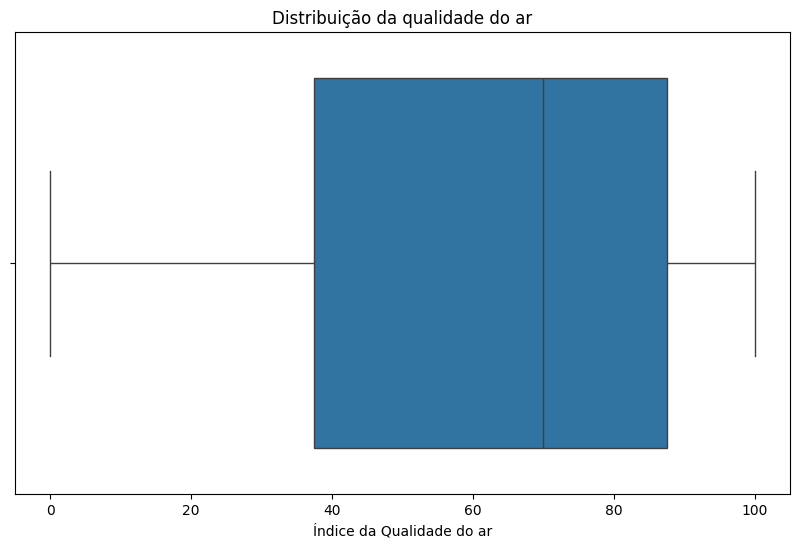

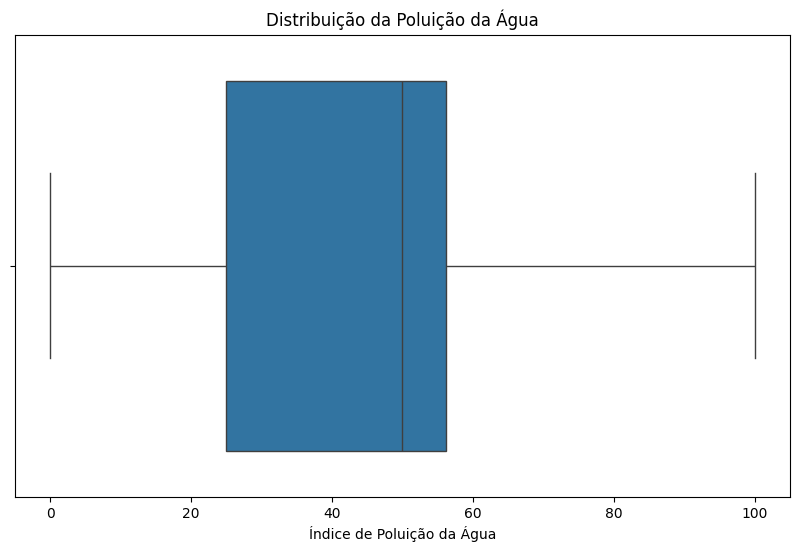

In [ ]:
#verificando a existência de outliers
#boxplot para ver outliers em relação a qualidade do ar
plt.figure(figsize=(10, 6))
sns.boxplot(x=gs['AirQuality'])
plt.title('Distribuição da qualidade do ar')
plt.xlabel('Índice da Qualidade do ar')


# Boxplot para ver outliers em relação à água
plt.figure(figsize=(10, 6))
sns.boxplot(x=gs['WaterPollution'])
plt.title('Distribuição da Poluição da Água')
plt.xlabel('Índice de Poluição da Água')
plt.show()

plt.show()

# Análise de correlação

## Hipótese: Após vermos a correlação das variáveis 'AirQuality' e 'WaterPollution', pensamos na possibilidade de uma relação entre a qualidade do ar e a poluição da água, considerando que um aumento na qualidade do ar poderia estar associado a uma diminuição na poluição da água, e vice-versa. No entanto, para ter certeza, análises mais profundas são necessárias

In [ ]:
# correlação entre a poluição da água e a qualidade do ar
gs[['AirQuality', 'WaterPollution']].corr()

,AirQuality,WaterPollution
AirQuality,1.000000,-0.443139
WaterPollution,-0.443139,1.000000


## Testando a hipótese analisando cidades

In [ ]:
#agrupando por cidades
cidades = gs.groupby('City')[['AirQuality','WaterPollution']].mean()

cidades.describe()

,AirQuality,WaterPollution
count,3384.000000,3384.000000
mean,61.639963,44.729090
std,31.290005,25.480025
min,0.000000,0.000000
25%,37.500000,25.000000
50%,68.750000,50.000000
75%,87.500000,56.994048
max,100.000000,100.000000


In [ ]:
#pegando as 10 cidades com a melhor qualidade de ar
cidades_melhor_ar = cidades.sort_values(by='AirQuality', ascending=False).head(10)

cidades_melhor_ar

,AirQuality,WaterPollution
City,,
Liberia,100.0,0.000000
Senneterre,100.0,50.000000
Seminole,100.0,0.000000
Cottbus,100.0,50.000000
Selkirk,100.0,0.000000
Segovia,100.0,0.000000
Cranbrook,100.0,16.666667
Seaside,100.0,0.000000
Crescent City,100.0,0.000000


In [ ]:
#pegando as 10 cidades com a melhor qualidade da água
cidades_melhor_agua = cidades.sort_values(by='WaterPollution', ascending=True).head(10)

cidades_melhor_agua[['WaterPollution', 'AirQuality']]

,WaterPollution,AirQuality
City,,
Gilbert,0.0,75.000000
Bentonville,0.0,91.666667
Vinkovci,0.0,100.000000
Laramie,0.0,100.000000
Visby,0.0,75.000000
Oldham,0.0,100.000000
Ibajay,0.0,50.000000
Bend,0.0,100.000000
Rochdale,0.0,50.000000


In [ ]:
# as 10 cidades com a pior qualidade de ar
cidades_pior_ar = cidades.sort_values(by='AirQuality', ascending=True).head(10)

cidades_pior_ar

,AirQuality,WaterPollution
City,,
Elbasan,0.0,25.0
Tanjung Pinang,0.0,25.0
Cankuzo,0.0,100.0
Cangzhou,0.0,25.0
Tartus,0.0,100.0
Nanchong,0.0,50.0
Kitwe,0.0,100.0
Temirtau,0.0,75.0
California,0.0,100.0


In [ ]:
# as 10 cidades com a pior qualidade da agua
cidades_pior_agua = cidades.sort_values(by='WaterPollution', ascending=False).head(10)

cidades_pior_agua[['WaterPollution', 'AirQuality']]

,WaterPollution,AirQuality
City,,
Pasay,100.0,25.0
Enugu,100.0,5.0
Cotonou,100.0,25.0
Lod,100.0,25.0
Popondetta,100.0,50.0
Yangjiang,100.0,20.0
Grapevine,100.0,0.0
Jableh,100.0,0.0
Gravesend,100.0,0.0


## Testando a hipótese analisando países

In [ ]:
#agrupando por paises
paises = gs.groupby('Country')[['AirQuality','WaterPollution']].mean()

paises.describe()

,AirQuality,WaterPollution
count,149.000000,149.000000
mean,53.445010,54.340971
std,22.135178,19.304992
min,0.000000,0.000000
25%,37.500000,42.415559
50%,51.636905,53.938521
75%,68.750466,67.400193
max,100.000000,100.000000


In [ ]:
#paises com o melhor ar
paises.sort_values(by='AirQuality', ascending=False).head(10)

,AirQuality,WaterPollution
Country,,
Turkmenistan,100.000000,0.000000
Federated States of Micronesia,100.000000,100.000000
Eritrea,100.000000,25.000000
Estonia,94.190796,28.313349
Eswatini,93.750000,52.083333
Finland,92.547928,24.634330
Norway,89.200414,27.176989
Barbados,88.333333,46.666667
Latvia,87.500000,12.500000


In [ ]:
#paises com a melhor agua
paises.sort_values(by='WaterPollution', ascending=True).head(10)

,AirQuality,WaterPollution
Country,,
Turkmenistan,100.000000,0.000000
Latvia,87.500000,12.500000
Chad,81.250000,18.750000
Sweden,82.938708,18.842412
Switzerland,82.447531,21.033726
Slovenia,76.656342,22.613987
Finland,92.547928,24.634330
Eritrea,100.000000,25.000000
Kenya,81.250000,25.000000


## Plotando gráficos para aprofundamento na hipótese

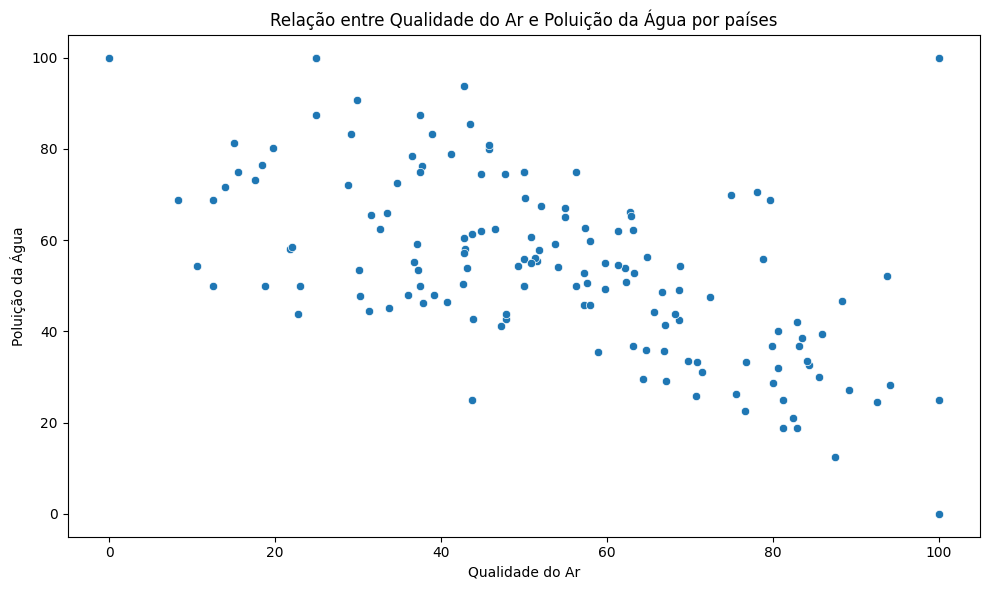

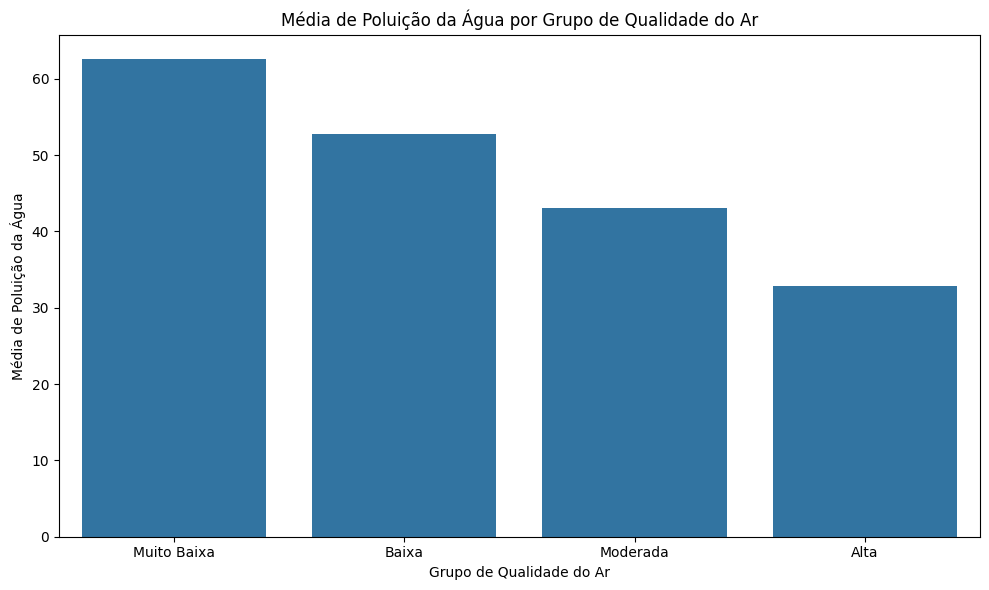

In [ ]:
#plotando grafico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AirQuality', y='WaterPollution', data= paises)
plt.title('Relação entre Qualidade do Ar e Poluição da Água por países')
plt.xlabel('Qualidade do Ar')
plt.ylabel('Poluição da Água')
plt.tight_layout()
plt.show()

# Agrupando por faixa de qualidade do ar
bins = [0, 25 , 50, 75, 100]
labels = ['Muito Baixa', 'Baixa', 'Moderada', 'Alta']
gs['AirQualityGroup'] = pd.cut(gs['AirQuality'], bins=bins, labels=labels, include_lowest=True)

# Calcular a média de poluição da água para cada grupo de qualidade do ar
grouped_data = gs.groupby('AirQualityGroup')['WaterPollution'].mean().reset_index()

# Visualizar o resultado
plt.figure(figsize=(10, 6))
sns.barplot(x='AirQualityGroup', y='WaterPollution', data=grouped_data)
plt.title('Média de Poluição da Água por Grupo de Qualidade do Ar')
plt.xlabel('Grupo de Qualidade do Ar')
plt.ylabel('Média de Poluição da Água')
plt.tight_layout()
plt.show()

# Aplicando modelo de regressão linear

In [ ]:
#usando todo o dataset
X = gs[['AirQuality']]
y = gs['WaterPollution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Modelo usando todo o dataset')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}\n')

#usando as cidades
X = cidades[['AirQuality']]
y = cidades['WaterPollution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Modelo usando as cidades')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}\n')

#modelo com os países
X = paises[['AirQuality']]
y = paises['WaterPollution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print('Modelo usando os países')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}\n')

Modelo usando todo o dataset
Mean Squared Error: 530.987611560232
R^2 Score: 0.1592945781220675

Modelo usando as cidades
Mean Squared Error: 512.3789109964093
R^2 Score: 0.2421467239183076

Modelo usando os países
Mean Squared Error: 174.62940156884216
R^2 Score: 0.4694811741583086



#Após uma análise mais detalhada, observamos que, embora haja uma relação moderada entre a qualidade do ar e a poluição da água, essa relação pode não ser tão direta quanto inicialmente suposto, essa associação não é suficiente para explicar completamente a variabilidade na poluição da água. Outros fatores não apresentados no dataset podem desempenhar um papel significativo na determinação dos níveis de poluição da água. Portanto, é necessário considerar esses outros fatores para uma compreensão mais abrangente e precisa.

#A análise também nos trouxe uma heterogeneidade dos dados, o que significa que diferentes subgrupos (como cidades ou países) podem ter padrões de relacionamento diferentes entre as variáveis. Por exemplo, em determinadas cidades ou países, a qualidade do ar pode ter uma influência mais forte na poluição da água do que em outras áreas.